In [2]:
# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import os
from skimage import data, color, gray2rgb,gray2rgb
from skimage.transform import rescale, resize, downscale_local_mean

In [3]:
train = pd.read_csv("/kaggle/input/shai-level-2-training-2023/train.csv")
train.head()

,Image,Label
0,597631776.jpeg,normal
1,35266064.jpeg,virus
2,467414642.jpeg,normal
3,35667640.jpeg,normal
4,618841263.jpeg,normal


In [26]:
# loading training images
train_img = []
path_sub_folder =["covid","normal","virus"]

for img_name in tqdm(train['Image']):
    for sub_folder in path_sub_folder:
        image_path = '/kaggle/input/shai-level-2-training-2023/train/' +sub_folder+ '/'+ str(img_name) 
        if os.path.exists(image_path) and (image_path.endswith('.jpg') or image_path.endswith('.png') or image_path.endswith('.jpeg')):
            img = imread(image_path,as_gray=True, plugin='matplotlib')
            if len(list(img.shape)) < 3:
                img = gray2rgb(image_path)
            elif len(list(img.shape)) > 3:
                img = rgba2rgb(img)
            img = img/255.0
            img = img.astype('float32')
            train_img.append(img)
        else:
            pass

  0%|          | 0/1196 [00:00<?, ?it/s]


NameError: name 'gray2rgb' is not defined

In [ ]:
if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
                try:
                    image = io.imread(filename)
                    if len(list(image.shape)) < 3:
                        image = gray2rgb(filename)
                    elif len(list(image.shape)) > 3:
                        image = rgba2rgb(image)

In [17]:
# converting the list to numpy array
train_x = np.array(train_img)
# defining the target
train_y = train['Label'].values
train_x.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


(1196,)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f1bf3034e90>)

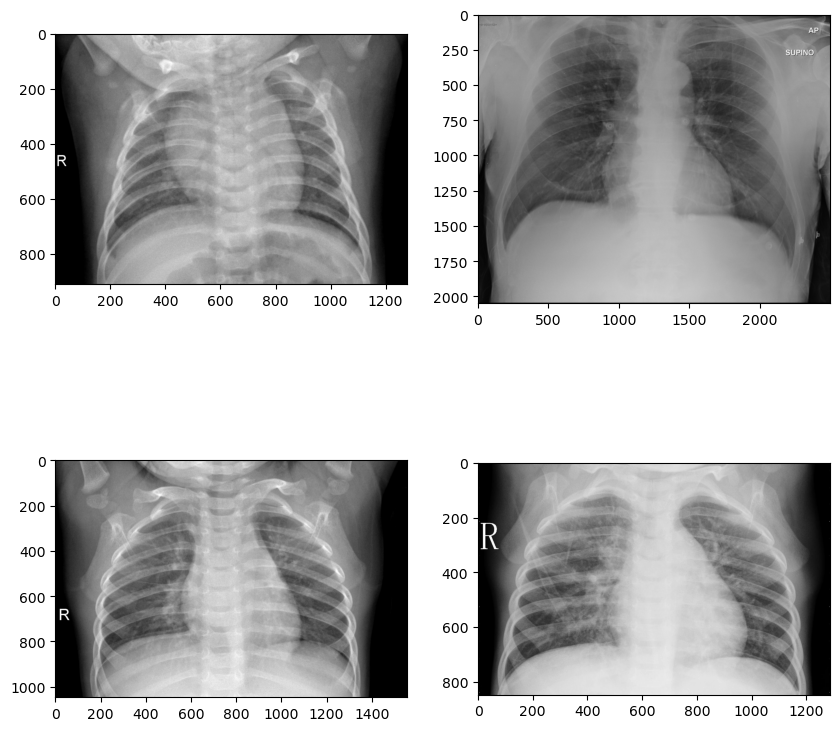

In [21]:
# visualizing images
i = 0
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(train_x[i], cmap='gray')
plt.subplot(222), plt.imshow(train_x[i+25], cmap='gray')
plt.subplot(223), plt.imshow(train_x[i+50], cmap='gray')
plt.subplot(224), plt.imshow(train_x[i+75], cmap='gray')

In [18]:
# create validation set
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1)
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape)

(((1076,), (1076,)), ((120,), (120,)))

In [21]:
# converting training images into torch format
train_x = train_x.reshape(120, 1, 64, 64)
train_x  = torch.from_numpy(train_x)

# converting the target into torch format
train_y = train_y.astype(int);
train_y = torch.from_numpy(train_y)

# shape of training data
train_x.shape, train_y.shape

ValueError: cannot reshape array of size 1076 into shape (120,1,64,64)